<a href="https://colab.research.google.com/github/chefdarek/DS-Unit-1-Sprint-4-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [ ]:
import numpy as np
import pandas as pd
import functools

In [ ]:
import matplotlib.pyplot as plt

In [ ]:


def meanMedianMode(numbers):
    #return dict of mean:v :med: mode: from list
    #mean script
    mean = functools.reduce(lambda x,y : x + y, numbers)// len(numbers)
    
    #median script
    n = len(numbers) 
    numbers.sort() 
    if n % 2 == 0: 
        median1 = numbers[n//2] 
        median2 = numbers[n//2 - 1] 
        median = (median1 + median2)/2
        
    else: 
        median = numbers[n//2] 
        
  
    #mode script
    largestCount = 0
    modes = []
    for x in numbers:
        if x in modes:
            continue
    count = numbers.count(x)
    if count > largestCount:
        del modes[:]
        modes.append(x)
        largestCount = count
    elif count == largestCount:
        modes.append(x)
    
    
    dict1 = {"mean": mean,"median":median, "mode": modes}
    print(dict1)
    
def variance(list):

  return sum([(xi - np.mean(list))**2 for xi in list]) / (len(list) -1)

#manual standard
def stddev(list):
  var = variance(list)
  return var**(1/2)

In [ ]:
sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]

In [5]:
meanMedianMode(sales)

{'mean': 3052, 'median': 3027, 'mode': [3700]}


In [6]:
variance(sales)

214387.90476190476

In [7]:
sales_std = stddev(sales)
sales_std

463.02041505953576

## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [ ]:
customer_count =[127, 80, 105, 92, 120, 115, 93]

In [9]:
d = {'sales': sales, 'customer_count': customer_count}
salesdf = pd.DataFrame(data=d)
salesdf 
salesdf

,sales,customer_count
0,2400,127
1,2689,80
2,2798,105
3,3027,92
4,3250,120
5,3505,115
6,3700,93


In [10]:
as_array = np.array(salesdf)
as_array

array([[2400,  127],
       [2689,   80],
       [2798,  105],
       [3027,   92],
       [3250,  120],
       [3505,  115],
       [3700,   93]])

In [11]:
np.cov(as_array, ddof=0)

array([[1291632.25, 1482564.25, 1530297.25, 1667813.75, 1778622.5 ,
        1926367.5 , 2049677.75],
       [1482564.25, 1701720.25, 1756509.25, 1914353.75, 2041542.5 ,
        2211127.5 , 2352665.75],
       [1530297.25, 1756509.25, 1813062.25, 1975988.75, 2107272.5 ,
        2282317.5 , 2428412.75],
       [1667813.75, 1914353.75, 1975988.75, 2153556.25, 2296637.5 ,
        2487412.5 , 2646636.25],
       [1778622.5 , 2041542.5 , 2107272.5 , 2296637.5 , 2449225.  ,
        2652675.  , 2822477.5 ],
       [1926367.5 , 2211127.5 , 2282317.5 , 2487412.5 , 2652675.  ,
        2873025.  , 3056932.5 ],
       [2049677.75, 2352665.75, 2428412.75, 2646636.25, 2822477.5 ,
        3056932.5 , 3252612.25]])

In [12]:
np.cov(as_array.T, ddof=1)

array([[214387.9047619 ,   -869.64285714],
       [  -869.64285714,    290.95238095]])

In [14]:
covariance = salesdf.cov()
covariance

,sales,customer_count
sales,214387.904762,-869.642857
customer_count,-869.642857,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [ ]:
cust_std = stddev(customer_count)

In [16]:
cor_coef = covariance/(cust_std*sales_std)
cor_coef

,sales,customer_count
sales,27.144959,-0.110111
customer_count,-0.110111,0.036839


In [17]:
salesdf.corr()

,sales,customer_count
sales,1.000000,-0.110111
customer_count,-0.110111,1.000000


In [18]:
checked = np.corrcoef(salesdf)
checked

array([[1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1.]])

In [19]:
np.cov(salesdf,ddof=0)

array([[1291632.25, 1482564.25, 1530297.25, 1667813.75, 1778622.5 ,
        1926367.5 , 2049677.75],
       [1482564.25, 1701720.25, 1756509.25, 1914353.75, 2041542.5 ,
        2211127.5 , 2352665.75],
       [1530297.25, 1756509.25, 1813062.25, 1975988.75, 2107272.5 ,
        2282317.5 , 2428412.75],
       [1667813.75, 1914353.75, 1975988.75, 2153556.25, 2296637.5 ,
        2487412.5 , 2646636.25],
       [1778622.5 , 2041542.5 , 2107272.5 , 2296637.5 , 2449225.  ,
        2652675.  , 2822477.5 ],
       [1926367.5 , 2211127.5 , 2282317.5 , 2487412.5 , 2652675.  ,
        2873025.  , 3056932.5 ],
       [2049677.75, 2352665.75, 2428412.75, 2646636.25, 2822477.5 ,
        3056932.5 , 3252612.25]])

## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')

In [21]:
df

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.000000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.916700,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.000000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
5,6,1.0,1.0,"Anderson, Mr. Harry",male,48.000000,0.0,0.0,19952,26.5500,E12,S,3,NaN,"New York, NY",1
6,7,1.0,1.0,"Andrews, Miss. Kornelia Theodosia",female,63.000000,1.0,0.0,13502,77.9583,D7,S,10,NaN,"Hudson, NY",1
7,8,1.0,0.0,"Andrews, Mr. Thomas Jr",male,39.000000,0.0,0.0,112050,0.0000,A36,S,NaN,NaN,"Belfast, NI",1
8,9,1.0,1.0,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,53.000000,2.0,0.0,11769,51.4792,C101,S,D,NaN,"Bayside, Queens, NY",1
9,10,1.0,0.0,"Artagaveytia, Mr. Ramon",male,71.000000,0.0,0.0,PC 17609,49.5042,NaN,C,NaN,22.0,"Montevideo, Uruguay",0


In [22]:
df.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [ ]:
df.drop(["name","sex","ticket","cabin","embarked","boat","home.dest"], axis=1, inplace=True)


In [24]:
df.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
age                 float64
sibsp               float64
parch               float64
fare                float64
body                float64
has_cabin_number      int64
dtype: object

In [ ]:
df.describe()
df.isna().sum()
df = df.dropna(axis=0)


In [ ]:
df = df.drop('body', axis=1)

In [ ]:
df_mat = np.asmatrix(df)

In [53]:
tit_CV = np.cov(df_mat,ddof=0)
tit_CV

array([[  2418.96746094,    817.63698078,   3633.26361328, ...,
         -3083.54544922,  -3002.35782391,  -3110.61263672],
       [   817.63698078,    678.8745613 ,   1246.08274273, ...,
          -713.39370602,   -899.4101226 ,   -847.00216227],
       [  3633.26361328,   1246.08274273,   5461.84889648, ...,
         -3857.47907227,  -3740.62032367,  -3899.11422852],
       ...,
       [ -3083.54544922,   -713.39370602,  -3857.47907227, ...,
        183363.53795898, 184101.43104008, 184366.22780273],
       [ -3002.35782391,   -899.4101226 ,  -3740.62032367, ...,
        184101.43104008, 184961.12421693, 185175.29602133],
       [ -3110.61263672,   -847.00216227,  -3899.11422852, ...,
        184366.22780273, 185175.29602133, 185414.10514648]])

In [50]:
tit_CE = print(np.corrcoef(df_mat, ddof=0))
tit_CE

[[ 1.          0.63804417  0.99956734 ... -0.14641273 -0.14194079
  -0.14687894]
 [ 0.63804417  1.          0.6471162  ... -0.06394079 -0.08026437
  -0.07549503]
 [ 0.99956734  0.6471162   1.         ... -0.12189257 -0.11768837
  -0.12252501]
 ...
 [-0.14641273 -0.06394079 -0.12189257 ...  1.          0.99967872
   0.99989292]
 [-0.14194079 -0.08026437 -0.11768837 ...  0.99967872  1.
   0.99993423]
 [-0.14687894 -0.07549503 -0.12252501 ...  0.99989292  0.99993423
   1.        ]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: bias and ddof have no effect and are deprecated
  """Entry point for launching an IPython kernel.


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [31]:
a = np.array([4,0])
b = np.array([0,-4])
a.dot(b)

0

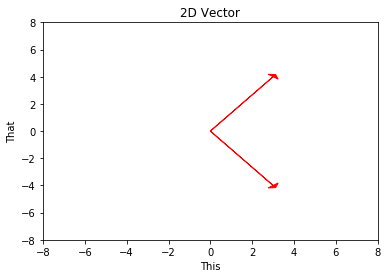

In [32]:
plt.arrow(0,0,3, 4, head_length=0.2, head_width=0.6,color='r')
plt.arrow(0,0,3, -4, head_length=0.2, head_width=0.6,color='r')

plt.title('2D Vector')
plt.xlim([-8,8])
plt.ylim([-8,8])
plt.xlabel('This')
plt.ylabel('That')
plt.show()

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [33]:
c = np.array([-5, 3, 7])
d = np.array([6, -8, 2])
c.dot(d)
#the dot products are not zero

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [34]:
c = np.array([2, -15, 6, 20])
print(np.linalg.norm(c)**2)
print(c.dot(c))
print(c.T.dot(c))
#these are all just different executions/operation to get the same result?

665.0
665
665


# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

$\vec{d} = 7x + 12y$

$\vec{e} = 2x + 11y - 8z$

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [35]:
f = np.array([4, 12, 11, 9, 2])
unit_vector_f = f/np.linalg.norm(f)
unit_vector_f

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

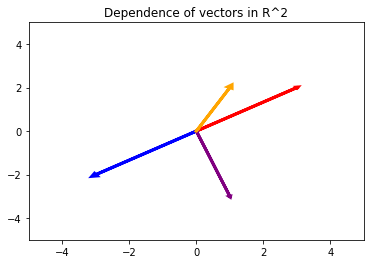

In [36]:
# Dependent Linear determinate is zero
this_hat = [3,2]
that_hat = [-3,-2]
#Linear Independent determinate is non zero
theother_hat = [1,-3]
thing_hat = [1,2]


plt.xlim(-5,5)
plt.ylim(-5,5)

# PLot Vectors
plt.arrow(0, 0, *this_hat, linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.arrow(0, 0, *that_hat, linewidth=3, head_width=.15, head_length=0.15, color ='blue')
plt.arrow(0, 0, *theother_hat, linewidth=3, head_width=.05, head_length=0.05, color ='purple')
plt.arrow(0, 0, *thing_hat, linewidth=3, head_width=.15, head_length=0.15, color ='orange')
plt.title("Dependence of vectors in R^2")
plt.show();

In [37]:
Vzy = np.array([
    [0,0,0],
    [-1,0,-1],
    [1,0,1]
])
np.linalg.det(Vzy)


0.0

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


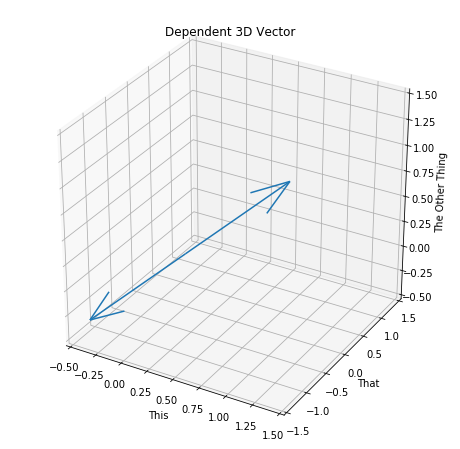

In [39]:

vectors = np.array([
    [0, 0, 0, -1, 0, -1],
    [0, 0, 0, 1, 0, 1]
])
Q, R, S, T, U, V = zip(*vectors)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.quiver(Q, R, S, T, U, V, length=1)
plt.title('Dependent 3D Vector')
ax.set_xlim([-.5,1.5])
ax.set_ylim([-1.5,1.5])
ax.set_zlim([-.5,1.5])
ax.set_zlabel('The Other Thing')
ax.set_xlabel('This')
ax.set_ylabel('That')
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [ ]:
# Sg = 1i^ + 2j^
# Sh = 4i^ + 8j^

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [ ]:
# just like the ones above but there is a k and it gets a fancy hat also. fancy hats.

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



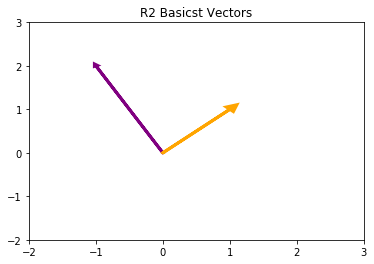

In [42]:
# R2 Basis Vectors
i_hat = [-1,2]
j_hat = [1,1]

plt.xlim(-2,3)
plt.ylim(-2,3)

# PLot Vectors
plt.arrow(0, 0, *i_hat, linewidth=3, head_width=.05, head_length=0.05, color ='purple')
plt.arrow(0, 0, *j_hat, linewidth=3, head_width=.15, head_length=0.15, color ='orange')
plt.title("R2 Basicst Vectors")
plt.show();

## 6.2 What does it mean to form a basis?

A basis of a vector space is any linearly independent subset of it that spans the whole vector space. In other words, each vector in the vector space can be written exactly in one way as a linear combination of the basis vectors.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [ ]:
P = np.array([
    [1, 2, 3],
    [-1, 0, 7],
    [4, 8, 2]
])

In [ ]:
from numpy import array
from scipy.linalg import lu
#guassian elimination

In [45]:
pl, P = lu(P, permute_l=True)
P

array([[4. , 8. , 2. ],
       [0. , 2. , 7.5],
       [0. , 0. , 2.5]])

In [46]:
np.linalg.matrix_rank(P)

3

## 7.2 What does the rank of a matrix tell us?



```
Rank descrbes the output of a vectors transformations column space
```



# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

In [ ]:
v = [1,3]
w = [-1, 2]
proj = np.multiply(3,v)

No handles with labels found to put in legend.


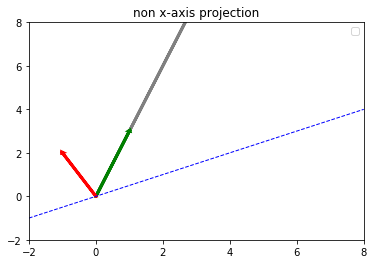

In [48]:
# Axis Bounds
plt.xlim(-2,8)          
plt.ylim(-2,8)

# Original Vector
v = [1,3] 
w = [-1,2]
proj = np.multiply(3,v)

# Set axes
axes = plt.gca()

# Get Vals for L
x_vals = np.array(axes.get_xlim())
y_vals = 1/2*x_vals

# Plot Vectors and L
plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0, 0, proj[0], proj[1], linewidth=3, head_width=.05, head_length=0.05, color ='gray')
plt.arrow(0, 0, v[0], v[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0, 0, w[0], w[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')
plt.legend()
plt.title("non x-axis projection")
plt.show();




## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## A function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 



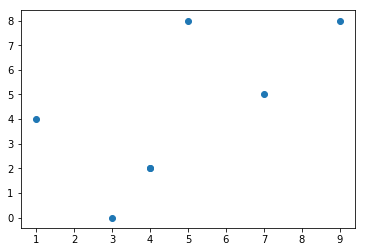

In [49]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()